# 4.7.4 Gradient Boosting 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/2017DC1.csv')   # 머신러닝 최종데이터 2017DC1.csv 불러오기
df.shape

(8751, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8751 non-null   float64
 1   Humidity         8751 non-null   float64
 2   Wind speed       8751 non-null   float64
 3   Visibility       8751 non-null   int64  
 4   Solar Radiation  8751 non-null   float64
 5   Rented Bike B    8751 non-null   float64
 6   Date             8751 non-null   float64
 7   Hour             8751 non-null   float64
 8   Seasons          8751 non-null   float64
 9   Functioning Day  8751 non-null   float64
 10  Holiday          8751 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 752.2 KB


In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

In [ ]:
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(random_state = 0)
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

grbt Accuracy on training set:0.93257
grbt Accuracy on test set:0.91819


In [ ]:
# 이하의 모든 그리드 서치 실행문은 StratifiedKFold의 shuffle 옵션, 혹은
# Gradient Boosting 모델의 내부 로직으로 인해 결과가 다르게 나올 수 있음에 유의

In [ ]:
# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

In [ ]:
# 그리드 서치 실행
# 아래 코딩 실행에 48초 소요
import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(5, 51, 5)}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.92114
GridSearchCV best parameter: {'max_depth': 5}
Runtime of the program is 48.307960987091064


In [ ]:
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(5, 16), 'n_estimators':[200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:0.92137
GridSearchCV best parameter: {'max_depth': 7, 'n_estimators': 200}


In [ ]:
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(11, 16), 'n_estimators':[100,200],
          'learning_rate':[0.01, 0.1, 1]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:0.92000
GridSearchCV best parameter: {'learning_rate': 1, 'max_depth': 11, 'n_estimators': 100}


In [ ]:
# 그리드 서치 실행문은 StratifiedKFold의 shuffle 옵션, 혹은
# Gradient Boosting 모델의 내부 로직으로 인해 결과가 다르게 나올 수 있기에
# 실행시마다 아래 코딩 결과(Accuracy 및 ROC AUC값)이 다르게 나올 수 있음

In [ ]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.91476
ROC AUC on test set:0.97437


In [ ]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치를 (필요시) 추가
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

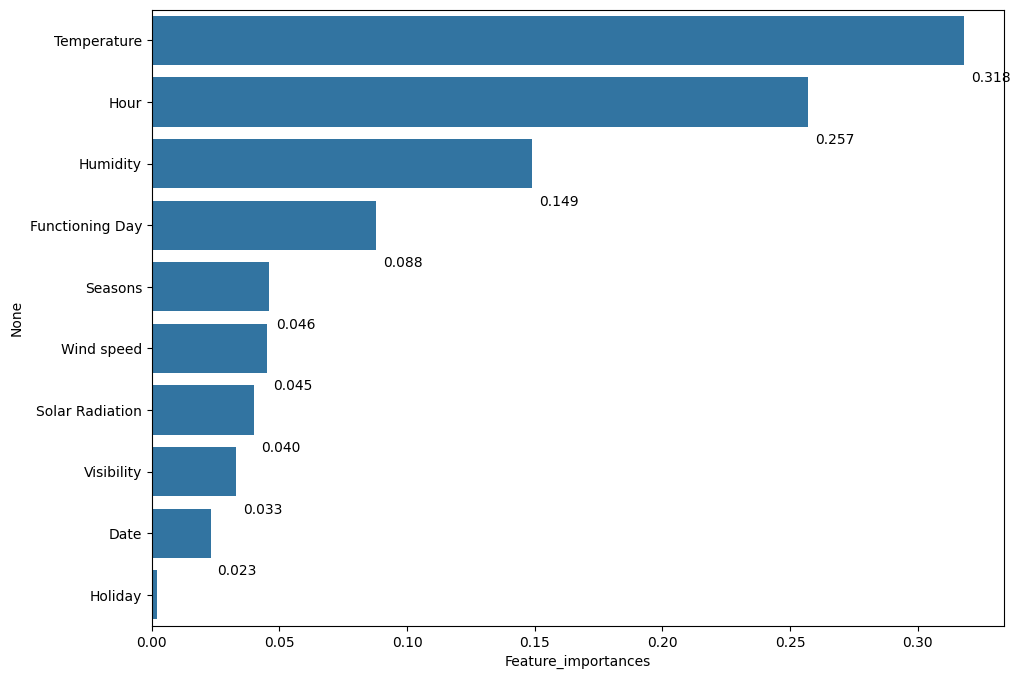

In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)

# 데이터프레임 dft1의 막대그래프(plot.barh) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

# 이하 코딩 -> 4.8 그래서 주택 가격은 얼마일까?

In [ ]:
# Gradient Boosting 최적 모델

import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 13,
                                    n_estimators = 200, random_state = 0)
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
type(pred)

numpy.ndarray

In [ ]:
y_test

2333    0.0
2778    1.0
5037    0.0
6859    0.0
5638    1.0
8196    1.0
8213    0.0
7328    0.0
6330    0.0
5409    1.0
1446    0.0
2862    1.0
6861    1.0
8347    0.0
4952    1.0
5889    1.0
5723    1.0
6656    1.0
4466    1.0
6583    1.0
4508    0.0
8745    1.0
4900    1.0
4169    1.0
3543    1.0
3782    1.0
4633    1.0
5983    1.0
8145    1.0
1373    0.0
1740    0.0
8631    0.0
7121    0.0
1765    0.0
5426    1.0
3532    1.0
3684    1.0
5615    1.0
5848    1.0
80      0.0
1038    0.0
7758    1.0
453     0.0
2002    0.0
333     0.0
2473    0.0
3932    0.0
5457    1.0
3961    1.0
8699    1.0
8673    1.0
2580    1.0
1992    0.0
1175    0.0
7923    1.0
4217    1.0
4870    1.0
4842    1.0
3148    0.0
5242    1.0
8543    1.0
6192    1.0
3032    1.0
3142    0.0
4201    1.0
1061    0.0
3555    1.0
6218    1.0
6488    0.0
6026    1.0
8142    1.0
766     0.0
1406    0.0
7432    1.0
2859    0.0
3912    0.0
8374    1.0
4970    0.0
3885    0.0
221     0.0
6818    1.0
6051    1.0
6597    0.0
7601

In [ ]:
pred

array([0., 1., 0., ..., 1., 0., 0.])

In [ ]:
y_test_arr = y_test.to_numpy()
y_test_arr

array([0., 1., 0., ..., 1., 0., 0.])

In [ ]:
df_comparison = pd.DataFrame({'y_test': y_test_arr, 'pred': pred})
df_comparison.head(20)

,y_test,pred
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
5,1.0,1.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [ ]:
# reset_index( ) 조치 전
# 기존 인덱스는 순서가 shuffle 되어 있음

X_test.head(3)

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Date,Hour,Seasons,Functioning Day,Holiday
2333,3.0,94.0,0.3,444,0.01,7.0,8.0,1.0,1.0,1.0
2778,11.6,54.0,1.5,693,0.00,13.0,21.0,1.0,1.0,1.0
5037,22.1,97.0,0.5,152,0.00,13.0,5.0,2.0,1.0,1.0


In [ ]:
# 기존 인덱스를 삭제하고 새로운 인덱스로 리셋

X_test.reset_index(drop=True).head(3)

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Date,Hour,Seasons,Functioning Day,Holiday
0,3.0,94.0,0.3,444,0.01,7.0,8.0,1.0,1.0,1.0
1,11.6,54.0,1.5,693,0.00,13.0,21.0,1.0,1.0,1.0
2,22.1,97.0,0.5,152,0.00,13.0,5.0,2.0,1.0,1.0


In [ ]:
dfu = pd.concat([X_test.reset_index(drop=True), df_comparison], axis=1)
dfu.head()

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Date,Hour,Seasons,Functioning Day,Holiday,y_test,pred
0,3.0,94.0,0.3,444,0.01,7.0,8.0,1.0,1.0,1.0,0.0,0.0
1,11.6,54.0,1.5,693,0.00,13.0,21.0,1.0,1.0,1.0,1.0,1.0
2,22.1,97.0,0.5,152,0.00,13.0,5.0,2.0,1.0,1.0,0.0,0.0
3,20.7,69.0,1.3,2000,0.00,13.0,4.0,0.0,1.0,1.0,0.0,0.0
4,27.2,71.0,0.8,1920,0.02,13.0,6.0,2.0,1.0,1.0,1.0,0.0
